In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
#Read files from the website


In [2]:
def add(climate_data, url, name):
    data_city= pd.read_table(url, delim_whitespace=True, names=('Month', 'Day', 'Year', name))
    d1=data_city[['Month', 'Day', 'Year']]                       
    data_city['Date']=pd.to_datetime(d1)
    data_city=data_city[['Date',name]]
    climate_data=climate_data.merge(data_city, on = 'Date')
    return climate_data

In [3]:
N='AK_Anchorage_Temp'
url_1='https://academic.udayton.edu/kissock/http/Weather/gsod95-current/AKANCHOR.txt'
data_Anchorage = pd.read_table(url_1, delim_whitespace=True, names=('Month', 'Day', 'Year', N))
data_Anchorage.head()

,Month,Day,Year,AK_Anchorage_Temp
0,1,1,1995,23.2
1,1,2,1995,27.6
2,1,3,1995,32.0
3,1,4,1995,29.3
4,1,5,1995,30.1


In [4]:
data_Anchorage.shape

(9265, 4)

In [5]:
date1=data_Anchorage[['Month', 'Day', 'Year']]

In [6]:
data_Anchorage['Date']=pd.to_datetime(date1)

In [7]:
data_Anchorage.head()

,Month,Day,Year,AK_Anchorage_Temp,Date
0,1,1,1995,23.2,1995-01-01
1,1,2,1995,27.6,1995-01-02
2,1,3,1995,32.0,1995-01-03
3,1,4,1995,29.3,1995-01-04
4,1,5,1995,30.1,1995-01-05


In [8]:
data_Anchorage=data_Anchorage[['Date','AK_Anchorage_Temp' ]]
climate_data=data_Anchorage

In [9]:
url_2='https://academic.udayton.edu/kissock/http/Weather/gsod95-current/NDFARGO.txt'
climate_data=add(climate_data,url_2, 'ND_Fargo_Temp')

In [10]:
climate_data.head()

,Date,AK_Anchorage_Temp,ND_Fargo_Temp
0,1995-01-01,23.2,5.2
1,1995-01-02,27.6,10.1
2,1995-01-03,32.0,-3.8
3,1995-01-04,29.3,-6.3
4,1995-01-05,30.1,8.4


In [11]:
city_list=[['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/FLWPALMB.txt', 'FL_West_Palm_Beach_Temp'],
['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/VTBURLIN.txt', 'Vermont_Burlington_Temp'],
['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/TXELPASO.txt', 'TX_El_Paso_Temp'],
['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/WYCHEYEN.txt', 'Wyoming_Cheyenne_Temp'],
['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/CASANFRA.txt','San_Francisco_Temp'],
['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/OHCLEVEL.txt','Cleveland_Temp'],
['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/WIMILWAU.txt','Milwaukee_Temp'],
['https://academic.udayton.edu/kissock/http/weather/gsod95-current/NYNEWYOR.txt','New_York_City'], 
['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/HIHONOLU.txt', 'Honolulu_Temp'],
['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/ZACAPTWN.txt','SA_Cape_Town'],
['https://academic.udayton.edu/kissock/http/weather/gsod95-current/EGCAIRO.txt', 'Egypt_Cairo'],
['https://academic.udayton.edu/kissock/http/weather/gsod95-current/INDELHI.txt','India_Delhi'],
['https://academic.udayton.edu/kissock/http/weather/gsod95-current/CIBIEJNG.txt','China_Beijing'],
['https://academic.udayton.edu/kissock/http/weather/gsod95-current/SRSINGAP.txt','Singapore_Temp'],
['https://academic.udayton.edu/kissock/http/weather/gsod95-current/NZACKLND.txt', 'New_Zealand Auckland'],
['https://academic.udayton.edu/kissock/http/weather/gsod95-current/RSMOSCOW.txt', 'Russia_Moscow'],
['https://academic.udayton.edu/kissock/http/weather/gsod95-current/AGBUENOS.txt', 'Argentina Buenos_Aires'],
['https://academic.udayton.edu/kissock/http/weather/gsod95-current/PRLIMA.txt','Peru_Lima']]


In [12]:
for url in city_list:
    climate_data=add(climate_data, url[0], url[1])
climate_data.shape

(7627, 21)

In [13]:
climate_data.head(4)

,Date,AK_Anchorage_Temp,ND_Fargo_Temp,FL_West_Palm_Beach_Temp,Vermont_Burlington_Temp,TX_El_Paso_Temp,Wyoming_Cheyenne_Temp,San_Francisco_Temp,Cleveland_Temp,Milwaukee_Temp,...,Honolulu_Temp,SA_Cape_Town,Egypt_Cairo,India_Delhi,China_Beijing,Singapore_Temp,New_Zealand Auckland,Russia_Moscow,Argentina Buenos_Aires,Peru_Lima
0,1995-01-01,23.2,5.2,69.7,31.0,39.9,8.8,46.7,39.9,23.8,...,71.3,66.8,59.2,50.7,28.0,81.1,63.6,32.3,82.4,73.1
1,1995-01-02,27.6,10.1,68.7,30.1,37.0,19.0,47.3,23.5,14.5,...,72.5,67.8,57.5,52.1,29.0,81.7,63.8,31.7,75.1,74.0
2,1995-01-03,32.0,-3.8,68.9,25.9,41.3,11.3,49.6,21.4,15.5,...,73.2,66.9,57.4,53.8,29.9,82.4,59.2,26.8,73.7,73.6
3,1995-01-04,29.3,-6.3,68.0,23.1,40.1,5.0,50.0,15.2,3.9,...,71.9,69.5,59.3,53.7,34.5,82.6,61.2,15.9,77.1,74.5


In [14]:
climate_data=climate_data.set_index(['Date'])
climate_data.head()

,AK_Anchorage_Temp,ND_Fargo_Temp,FL_West_Palm_Beach_Temp,Vermont_Burlington_Temp,TX_El_Paso_Temp,Wyoming_Cheyenne_Temp,San_Francisco_Temp,Cleveland_Temp,Milwaukee_Temp,New_York_City,Honolulu_Temp,SA_Cape_Town,Egypt_Cairo,India_Delhi,China_Beijing,Singapore_Temp,New_Zealand Auckland,Russia_Moscow,Argentina Buenos_Aires,Peru_Lima
Date,,,,,,,,,,,,,,,,,,,,
1995-01-01,23.2,5.2,69.7,31.0,39.9,8.8,46.7,39.9,23.8,44.0,71.3,66.8,59.2,50.7,28.0,81.1,63.6,32.3,82.4,73.1
1995-01-02,27.6,10.1,68.7,30.1,37.0,19.0,47.3,23.5,14.5,41.8,72.5,67.8,57.5,52.1,29.0,81.7,63.8,31.7,75.1,74.0
1995-01-03,32.0,-3.8,68.9,25.9,41.3,11.3,49.6,21.4,15.5,28.1,73.2,66.9,57.4,53.8,29.9,82.4,59.2,26.8,73.7,73.6
1995-01-04,29.3,-6.3,68.0,23.1,40.1,5.0,50.0,15.2,3.9,31.7,71.9,69.5,59.3,53.7,34.5,82.6,61.2,15.9,77.1,74.5
1995-01-05,30.1,8.4,64.5,12.0,40.9,18.9,50.8,10.5,6.1,21.3,70.4,70.6,58.8,54.5,36.6,82.4,64.0,23.8,79.5,73.4


In [15]:
climate_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7627 entries, 1995-01-01 to 2015-11-18
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AK_Anchorage_Temp        7627 non-null   float64
 1   ND_Fargo_Temp            7627 non-null   float64
 2   FL_West_Palm_Beach_Temp  7627 non-null   float64
 3   Vermont_Burlington_Temp  7627 non-null   float64
 4   TX_El_Paso_Temp          7627 non-null   float64
 5   Wyoming_Cheyenne_Temp    7627 non-null   float64
 6   San_Francisco_Temp       7627 non-null   float64
 7   Cleveland_Temp           7627 non-null   float64
 8   Milwaukee_Temp           7627 non-null   float64
 9   New_York_City            7627 non-null   float64
 10  Honolulu_Temp            7627 non-null   float64
 11  SA_Cape_Town             7627 non-null   float64
 12  Egypt_Cairo              7627 non-null   float64
 13  India_Delhi              7627 non-null   float64
 14  China_

In [16]:
np.percentile(climate_data['AK_Anchorage_Temp'], [2.5, 97.5])

array([ 2.365, 62.6  ])

In [17]:
# Find the outliers in the temperature data

In [18]:
climate_data[climate_data['AK_Anchorage_Temp']<-60].head()

,AK_Anchorage_Temp,ND_Fargo_Temp,FL_West_Palm_Beach_Temp,Vermont_Burlington_Temp,TX_El_Paso_Temp,Wyoming_Cheyenne_Temp,San_Francisco_Temp,Cleveland_Temp,Milwaukee_Temp,New_York_City,Honolulu_Temp,SA_Cape_Town,Egypt_Cairo,India_Delhi,China_Beijing,Singapore_Temp,New_Zealand Auckland,Russia_Moscow,Argentina Buenos_Aires,Peru_Lima
Date,,,,,,,,,,,,,,,,,,,,
1998-12-24,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
1998-12-25,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
1998-12-30,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
1998-12-31,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
1999-01-10,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0


In [19]:
climate_data=climate_data.replace(-99, np.nan)

In [20]:
climate_data.isnull().sum()

AK_Anchorage_Temp          13
ND_Fargo_Temp              25
FL_West_Palm_Beach_Temp    25
Vermont_Burlington_Temp    22
TX_El_Paso_Temp            19
Wyoming_Cheyenne_Temp      16
San_Francisco_Temp         36
Cleveland_Temp             14
Milwaukee_Temp             55
New_York_City              20
Honolulu_Temp              18
SA_Cape_Town               17
Egypt_Cairo                20
India_Delhi                36
China_Beijing              13
Singapore_Temp             14
New_Zealand Auckland       43
Russia_Moscow              14
Argentina Buenos_Aires     19
Peru_Lima                  21
dtype: int64

In [21]:
climate_data.to_csv('data/climate.csv')

In [22]:
climate_data.describe()

,AK_Anchorage_Temp,ND_Fargo_Temp,FL_West_Palm_Beach_Temp,Vermont_Burlington_Temp,TX_El_Paso_Temp,Wyoming_Cheyenne_Temp,San_Francisco_Temp,Cleveland_Temp,Milwaukee_Temp,New_York_City,Honolulu_Temp,SA_Cape_Town,Egypt_Cairo,India_Delhi,China_Beijing,Singapore_Temp,New_Zealand Auckland,Russia_Moscow,Argentina Buenos_Aires,Peru_Lima
count,7614.000000,7602.000000,7602.000000,7605.000000,7608.000000,7611.000000,7591.000000,7613.000000,7572.000000,7607.000000,7609.000000,7610.000000,7607.000000,7591.000000,7614.000000,7613.000000,7584.000000,7613.000000,7608.000000,7606.000000
mean,37.721907,42.970166,75.555670,47.055069,66.203444,46.850388,57.258912,51.422317,48.608875,55.986933,77.285281,62.331104,72.526660,76.804703,55.335763,82.133561,59.675949,42.357783,62.683636,67.090757
std,16.985082,24.187310,7.549624,19.887238,15.364580,17.318017,5.653676,18.453356,19.220724,17.091825,3.392106,6.868529,10.468613,13.197400,20.032675,2.165280,6.436488,19.480276,10.689108,4.976993
min,-19.600000,-29.500000,38.500000,-14.100000,8.400000,-12.000000,38.300000,-5.900000,-16.600000,8.500000,65.700000,44.900000,45.200000,43.900000,6.800000,74.000000,41.100000,-20.400000,35.300000,57.500000
25%,25.500000,24.925000,71.900000,32.200000,53.400000,34.100000,53.200000,36.400000,33.700000,42.200000,74.800000,56.800000,63.000000,65.200000,36.600000,80.600000,54.900000,28.700000,54.500000,62.700000
50%,38.350000,45.500000,77.200000,48.400000,68.200000,46.600000,57.400000,53.000000,49.000000,56.600000,77.500000,62.100000,73.600000,80.600000,57.800000,82.200000,59.500000,42.500000,63.050000,66.600000
75%,53.100000,64.175000,81.200000,64.400000,79.600000,61.700000,61.000000,67.700000,65.400000,71.300000,80.000000,67.900000,81.800000,87.300000,73.800000,83.800000,64.900000,59.000000,71.200000,71.200000
max,75.300000,91.400000,89.300000,87.400000,95.000000,84.700000,80.800000,87.200000,92.200000,93.700000,87.200000,83.800000,98.900000,103.700000,92.900000,88.500000,75.400000,87.300000,90.900000,81.800000


In [23]:
climate_data.columns

Index(['AK_Anchorage_Temp', 'ND_Fargo_Temp', 'FL_West_Palm_Beach_Temp',
       'Vermont_Burlington_Temp', 'TX_El_Paso_Temp', 'Wyoming_Cheyenne_Temp',
       'San_Francisco_Temp', 'Cleveland_Temp', 'Milwaukee_Temp',
       'New_York_City', 'Honolulu_Temp', 'SA_Cape_Town', 'Egypt_Cairo',
       'India_Delhi', 'China_Beijing', 'Singapore_Temp',
       'New_Zealand Auckland', 'Russia_Moscow', 'Argentina Buenos_Aires',
       'Peru_Lima'],
      dtype='object')

In [24]:
climate_data_1=climate_data[['AK_Anchorage_Temp', 'ND_Fargo_Temp', 'FL_West_Palm_Beach_Temp',
       'Vermont_Burlington_Temp', 'TX_El_Paso_Temp', 'Wyoming_Cheyenne_Temp',
       'San_Francisco_Temp', 'Cleveland_Temp', 'Milwaukee_Temp',
       'New_York_City', 'Honolulu_Temp',]]
climate_data_1.rename(columns={'AK_Anchorage_Temp':'Anchorage', 'ND_Fargo_Temp':'Fargo', 'FL_West_Palm_Beach_Temp':'West Palm Beach',
       'Vermont_Burlington_Temp':'Burlington', 'TX_El_Paso_Temp':'El Paso', 'Wyoming_Cheyenne_Temp':'Cheyenne',
       'San_Francisco_Temp':'San Francisco', 'Cleveland_Temp':'Cleveland', 'Milwaukee_Temp':'Milwaukee',
       'New_York_City':'NYC', 'Honolulu_Temp':'Honolulu',}, inplace=True)

C:\Users\nshan\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [25]:
climate_data_2=climate_data[['SA_Cape_Town','Egypt_Cairo', 'India_Delhi',
       'China_Beijing', 'Singapore_Temp', 'New_Zealand Auckland',
       'Russia_Moscow', 'Argentina Buenos_Aires', 'Peru_Lima']]
climate_data_1.rename(columns={'SA_Cape_Town':'Cape Town','Egypt_Cairo':'Cairo', 'India_Delhi':'Delhi', 'China_Beijing':'Beijing',
       'Singapore_Temp':'Singapore', 'New_Zealand Auckland':'Auckland', 'Russia_Moscow':'Moscow',
       'Argentina Buenos_Aires':'Buenos_Aires', 'Peru_Lima':'Lima', }, inplace=True)

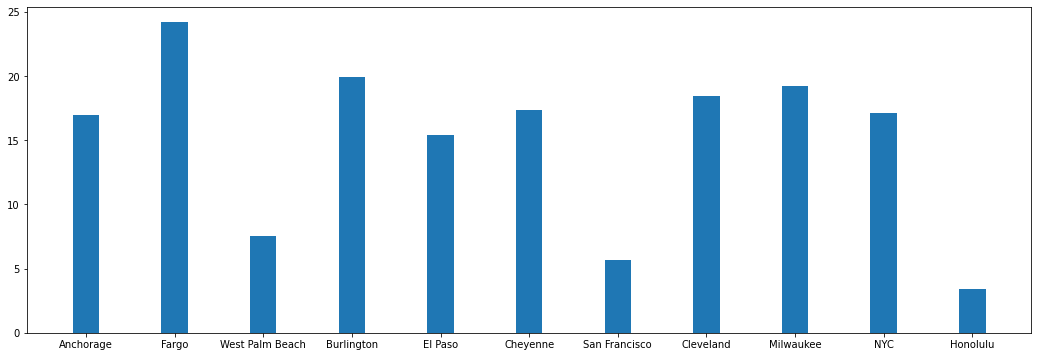

In [26]:
fig, ax = plt.subplots(figsize=(18,6))
ax.bar(climate_data_1.columns,climate_data_1.std(), width=0.3);

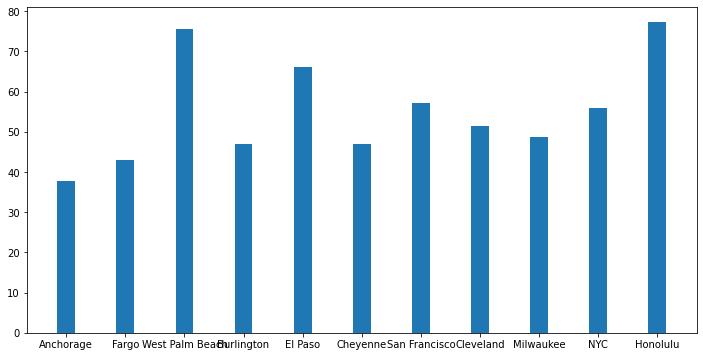

In [27]:
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(climate_data_1.columns,climate_data_1.mean(), width=0.3);

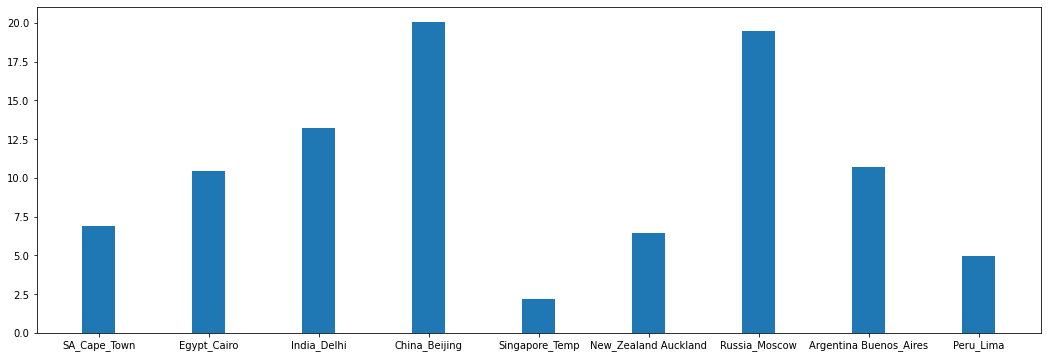

In [28]:
fig, ax = plt.subplots(figsize=(18,6))
ax.bar(climate_data_2.columns,climate_data_2.std(), width=0.3);

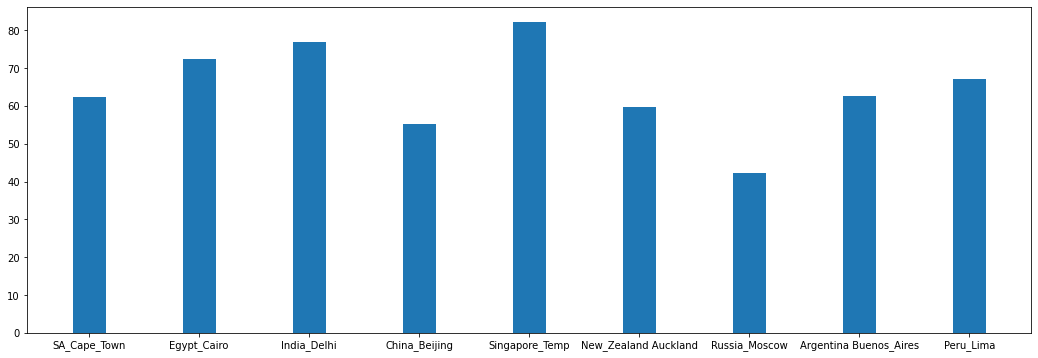

In [29]:
fig, ax = plt.subplots(figsize=(18,6))
ax.bar(climate_data_2.columns,climate_data_2.mean(), width=0.3);

In [30]:
#Show the data on graph to make sure there is no outliers.

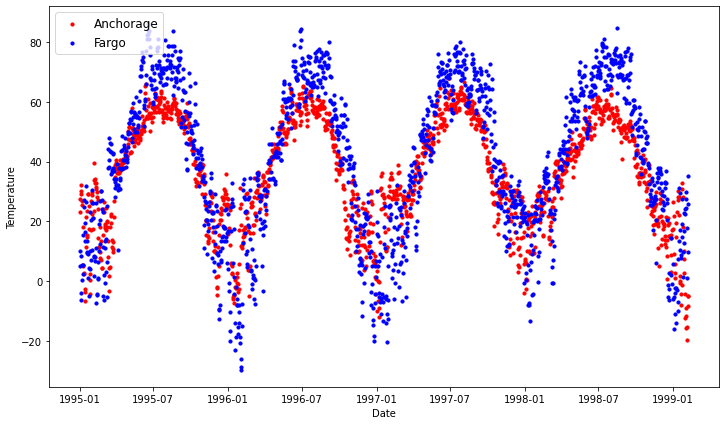

In [31]:
fig, ax = plt.subplots(figsize=(12,7))
plt.scatter(climate_data.index[0:1500],climate_data['AK_Anchorage_Temp'][0:1500], s=10, c='r',label='Anchorage' )
plt.scatter(climate_data.index[0:1500],climate_data['ND_Fargo_Temp'][0:1500],s=10, c='b',label='Fargo' )
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
plt.legend(loc='upper left',prop={"size":12})
plt.show()

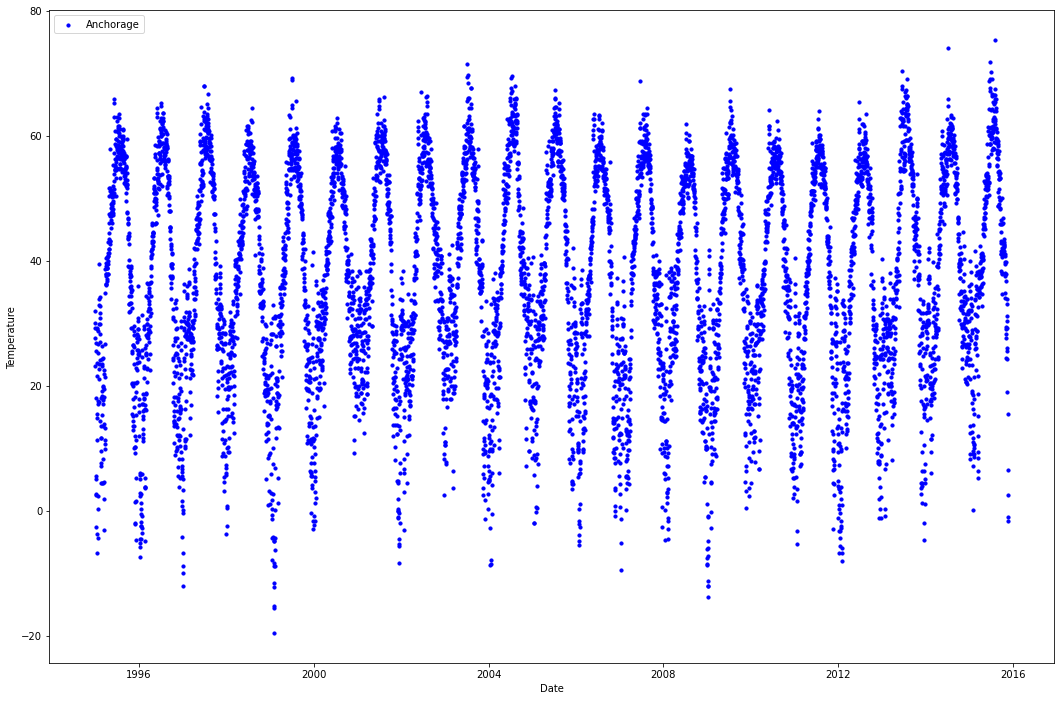

In [32]:
fig, ax = plt.subplots(figsize=(18,12))
ax.scatter(climate_data.index ,climate_data['AK_Anchorage_Temp'],s=10, c='b', label='Anchorage')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
plt.legend(loc='upper left')
plt.show()

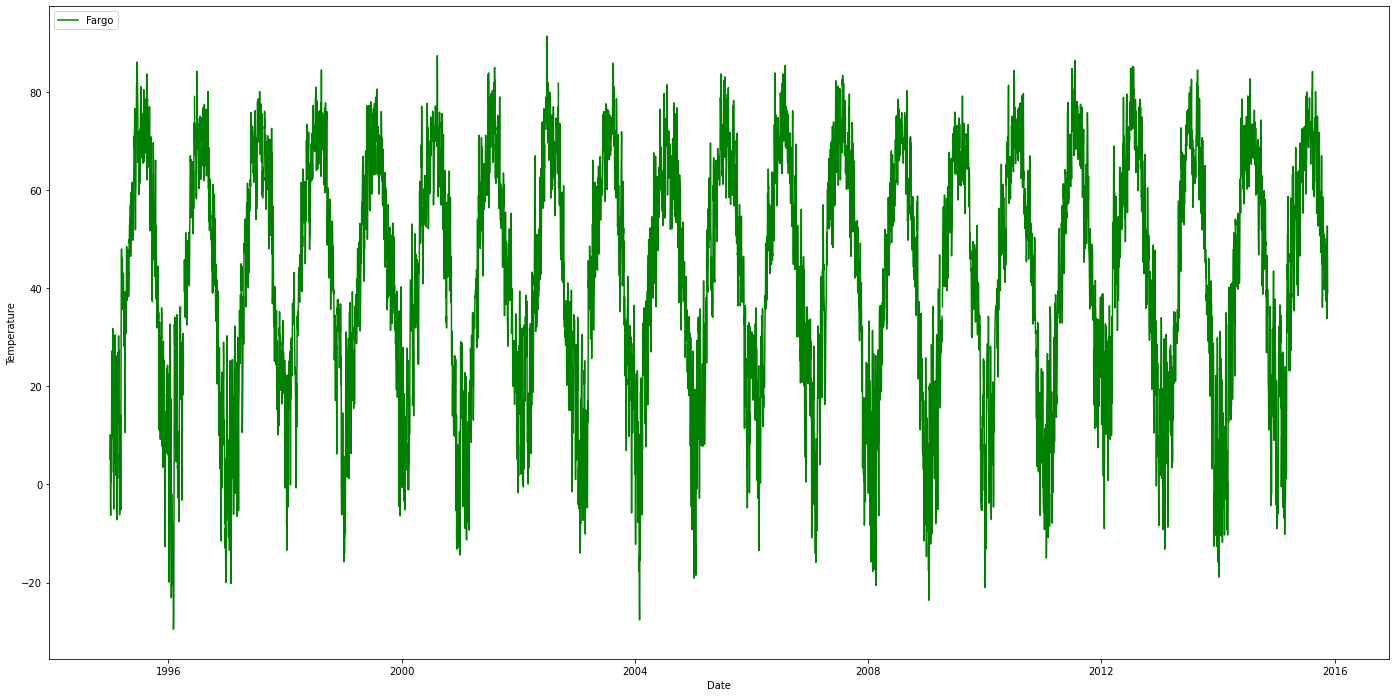

In [33]:
fig, ax = plt.subplots(figsize=(24,12))
ax.plot(climate_data.index ,climate_data['ND_Fargo_Temp'],c='g', label='Fargo')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
plt.legend(loc='upper left')
plt.show()